#Clasificador de flores

En este trabajo hemos construido un clasificador de imágenes de flores usando una red neuronal convolutiva

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Probando distintos tamaños de capas y configuraciones reflejados en la siguiente tabla. Tratamos siempre que los hiperparámetros sean potencias o múltiplos de 2, para facilitar los cálculos al ordenador. Para todos los modelos hemos usado 80 epochs y early stopping con 6 epochs de paciencia.  
Todos los modelos dan resultados relativamente buenos. Nos quedamos con el modelo que mejor resultado nos ha dado

| Convolutiva <br>+ MaxPooling2D | Convolutiva <br>+ MaxPooling2D | Convolutiva <br>+ MaxPooling2D | Convolutiva<br>+ MaxPooling2D | Dropout | Flatten | Dense | Dropout | Otros hiperparámetros | Precisión |
|:-:|:-:|-|-|-|-|-|-|-|-|
| 32 filtros 3x3 | 64 filtros 3x3 | 96 filtros 3x3 | 96 filtros 3x3 | 0.25 |  | 512 | 0.5 | learning rate = 0.001<br>batch_size = 64<br>img_size = 256 | 0.81 |
| 32 filtros 3x3 | 64 filtros 5x5 | 96 filtros 7x7 | - | 0.25 |  | 512 | 0.5 | learning rate = 0.001<br>batch size = 64<br>img size = 128 | 0.80 |
| 32 filtros 3x3 | 64 filtros 3x3 | 96 filtros 3x3 | - | 0.25 |  | 256 | 0.5 | learning rate = 0.001<br>batch_size = 32<br>img_size = 256 | 0.77 |
| 32 filtros 3x3 | 64 filtros 3x3 | 96 filtros 3x3 | - | 0.25 |  | 256 | 0.5 | learning rate = 0.001<br>batch_size = 32<br>img_size = 128 | 0.75 |
| 32 filtros 3x3 | 64 filtros 5x5 | 96 filtros 7x7 | 96 filtros 9x9 | 0.25 |  | 512 | 0.5 | learning rate = 0.001<br>batch size = 64<br>img size = 256 | 0.75 |
| 32 filtros 3x3 | 64 filtros 3x3 | - | - | 0.25 |  | 128 | 0.5 | learning rate = 0.001<br>batch size = 64<br>img size = 256 | 0.69 |
| 32 filtros 3x3 | 64 filtros 3x3 | - | - | 0.25 |  | 128 | 0.5 | learning rate = 0.001<br>batch size = 64<br>img size = 128 | 0.69 |




En la siguiente celda preparamos el dataset con data augmentation e identificamos el orden que van a tener las clases de salida para confeccionar más adelante la matriz de confusión:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
import keras
import matplotlib.pyplot as plt
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 64
img_size = 256

train_data_dir = '/content/gdrive/MyDrive/flowers/train'
validation_data_dir = '/content/gdrive/MyDrive/flowers/validation'
train_datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,
        rescale = 1./255
)

validation_datagen = ImageDataGenerator(
        rescale=1./255,
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        batch_size=batch_size,
        target_size=(img_size, img_size),
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        batch_size=batch_size,
        target_size=(img_size, img_size),
        class_mode='categorical')

classes = train_generator.class_indices

print(classes)


Found 2896 images belonging to 5 classes.
Found 1427 images belonging to 5 classes.
{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


Luego creamos, compilamos, entrenamos y guardamos el modelo. También generamos un gráfico con la función de pérdida y la precisión del modelo en el entrenamiento:

Epoch 1/80
46/46 [==============================] - 176s 2s/step - loss: 1.6177 - accuracy: 0.2800 - val_loss: 1.2051 - val_accuracy: 0.4898
Epoch 2/80
46/46 [==============================] - 48s 865ms/step - loss: 1.1920 - accuracy: 0.5018 - val_loss: 1.0822 - val_accuracy: 0.5830
Epoch 3/80
46/46 [==============================] - 48s 857ms/step - loss: 1.0915 - accuracy: 0.5540 - val_loss: 0.9989 - val_accuracy: 0.6181
Epoch 4/80
46/46 [==============================] - 48s 861ms/step - loss: 0.9997 - accuracy: 0.6061 - val_loss: 0.9570 - val_accuracy: 0.6279
Epoch 5/80
46/46 [==============================] - 56s 1s/step - loss: 0.9956 - accuracy: 0.5964 - val_loss: 0.8836 - val_accuracy: 0.6503
Epoch 6/80
46/46 [==============================] - 47s 867ms/step - loss: 0.9478 - accuracy: 0.6215 - val_loss: 0.8721 - val_accuracy: 0.6706
Epoch 7/80
46/46 [==============================] - 48s 858ms/step - loss: 0.8858 - accuracy: 0.6573 - val_loss: 0.8385 - val_accuracy: 0.6847
Epoc

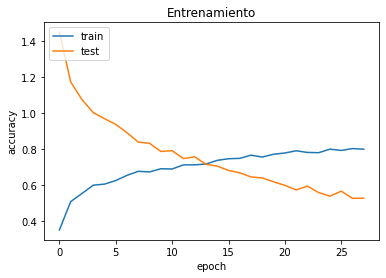

In [ ]:
# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])


# TRAINING --------------------------------------------------

epochs = 80

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=6, restore_best_weights=True)

history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data = validation_generator,
        workers = 12,
        callbacks = [es]
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Entrenamiento')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

# SAVING --------------------------------------------------

model.save("flowerClassifier.h5")

Finalmente cargamos el modelo, para que la celda sea independiente al entrenamiento si así se desea, y generamos la matriz de confusión.  
Los resultados son bastante buenos, como cabía esperar.

Found 1427 images belonging to 5 classes.


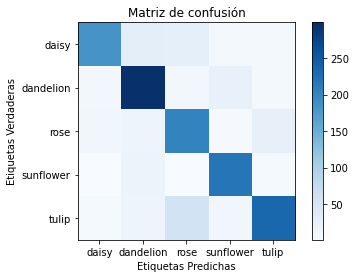

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from numpy import argmax
import matplotlib.pyplot as plt

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
model = load_model("/content/gdrive/MyDrive/flowers/flowerClassifier.h5")

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        batch_size=1,
        target_size=(img_size, img_size),
        class_mode='categorical',
        shuffle=False)

prediction = model.predict(
    validation_generator, 
    steps=len(validation_generator.filenames))
y_pred = argmax(prediction, axis=1)

cm = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Verdaderas")
plt.xticks([0,1,2,3,4], classes)
plt.yticks([0,1,2,3,4], classes)
plt.title('Matriz de confusión')
plt.colorbar()
plt.show()